<center><b>Cognitive Patterns in Psychiatric Diagnosis</b>

<center>Alex Bondarenko

<center>CogSci C127 Fall 2019

# Table of Contents
* [1. Introduction](#1.-Introduction)
	* [1.1 Background](#1.1-Background)
	* [1.2 Significance](#1.2-Significance)
* [2. Experimental Design and Dataset](#2.-Experimental-Design-and-Dataset)
	* [2.1 Subjects](#2.1-Subjects)
	* [2.2 Behavioral Task](#2.2-Behavioral-Task)
	* [2.3 Measurement](#2.3-Measurement)
	* [2.4 Data Structure](#2.4-Data-Structure)
* [3. Analysis](#3.-Analysis)
	* [3.1 Hypothesis](#3.1-Hypothesis)
	* [3.2 Preprocessing and Exploration](#3.2-Preprocessing-and-Exploration)
		* [3.2.1 Parcellation](#3.2.1-Parcellation)
	* [3.3 Feature Engineering](#3.3-Feature-Engineering)
	* [3.4 Prediction](#3.4-Prediction)
* [4. Conclusion](#4.-Conclusion)
	* [4.1 Interpretation of Results](#4.1-Interpretation-of-Results)
	* [4.2 Discussion](#4.2-Discussion)
* [5. Reproducing](#5.-Reproducing)


# 1. Introduction

**Summary**: Can we use the data driven modeling approach to investigate individual differences? Specifically, my goal was to investigate how one's psychiatric condition affects brain activity when performing tasks or in resting state, and if you could reliably predict the diagnoses of mental disorders for individuals given only this brain activity. Using a subset of data gathered from a large study (n=272) with four main diagnoses and seven tasks including resting state, I utilized data preprocessing techniques such as dimensionality reduction, explored group-level differences using visualization and statistical methods, and formulated the prediction of a psychiatric diagnosis as a machine learning problem. I was unable to find a good predictor given the data I analyzed. Better answers to this question would lead to a greater understanding of the cognitive component of mental health.

## 1.1 Background

At least since Phineas Gage, scientists have been interested in how individual changes in underlying brain *state* affects brain *function*. However, our understanding of the brain has changed a lot since 1848. The wide adoption of functional magnetic resonance imaging has led to a boon in neuroscientific research, giving us the ability to move beyond measuring the anatomical and chemical dimensions of the brain to answering questions about *cognition*, or our ability to process information and perform mental operations. Yet despite these advances, psychiatry is largely relegated to the same old techniques.

Recently work has gone into analyzing functional connectivity, the statistical patterns in BOLD activity.
This work has resulting in mapping large-scale networks whose behavior reflect existing anatomical structures as well as those corresponding to the associative cortices which are otherwise hard to detect.
Connectivity is important for understanding whole-brain function.
Issues with brain connectivity arise in neurodegenerative and psychiatric disorders, particularly in large-scale brain networks like the Default Mode Network which plays a role in resting-state experience.
However, usually these analyses focus on comparing a single condition with a control group on a single task (or in resting state), which makes sense under a hypothesis testing framework.

| Disorder | Cognitive deficit | Comment |
|:-|:-|:-|
| [Schizophrenia](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2913637/#sec1-6title) | WM, EF, Attention, Memory | "Cognitive dysfunctions play a central role in the illness" as negative and cognitive symptoms |
| [Bipolar Disorder](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2913637/#sec1-11title) | Attention, EF, Memory | Similarity observed with schizophrenia<a id="ref-1" href="#cite-pmid26742510"><sup>#</sup></a>, however evidence tentative |
| [Depression](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2913637/#sec1-13title) | EF, Verbal memory | "Numerous studies have demonstrated the presence of neuropsychological deficits" |
| [ADHD](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2913637/#sec1-16title) | Attention, EF, Memory | Commonly reported, with "converging evidence point[ing] to a prominent disturbance of EF" |

**Figure 1**. Summary of cognitive deficits associated with psychiatric disorders <a id="ref-1" href="#cite-pmid20703409">(Trivedi, 2006)</a>. <br>
EF: executive functioning; WM: working memory

However, there are various challenges when it comes to utilizing neuroscientific data to diagnose diseases:
 - **Dimensionality reduction**: Since fMRI is a high class space with many points across space and time, the question becomes how do you get that down to a representation that preserves enough information generates high-quality predictions, but is maybe more robust to noise or computationally feasible. As data collection methods improve, this will become more important.
 - **Diagnosis is inherently multi-class**, meaning you are largely discriminating between many possible diagnoses, not just between healthy and having a particular condition. As seen above, the symptomology conditions overlap. Differential diagnosis also deals with quandries such as co-occurance (*does the patient have comorbid Depression and ADHD?*), extent (*is the patient experiencing Major Depressive Disorder or dysthymia?*), and subtypes (*is the patient experiencing Inattentive or Hyperactive ADHD?*).
 - How do you **account for covariates**? Investigators take great care to remove the influence of factors that might interefere with the measured outcome. Even then, you must still account for changes across age, demographics, and time of collection. This only gets  when you might have to account for multi-site differences, patient histories, medication level, or any other conditions that occur when used on the public at large.
 - Are the results **interpretable**? How confident can you be in the results' accuracy? Can you explain the results to a patient? Do the results increase your understanding on how to treat the condition?

## 1.2 Significance

In any given year, an estimated 18.1% of U.S. adults over the age of 17 suffer from mental illness<a id="ref-1" href="#cite-nami"><sup>#</sup></a>. Despite this, mental illness remains poorly understood and often results in deficits in cognitive function. Studying the modulation of task performance under various psychiatric disorders would add to an understanding both of how normal subjects coordinate various cognitive functions to those ends and exactly what goes awry under compromised mental health, information that can be used in diagnosis and treatment. These findings give new insights on potential mechanisms underlying symptoms and cognitive deficits that are shared among psychiatric disorders.

Measuring these symptoms could both be useful both as an aid in diagnostic assessment and as "clinical endpoints" to target in the treatment.

# 2. Experimental Design and Dataset

UCLA Consortium for Neuropsychiatric Phenomics with neuroimaging as well as phenotypic information for n=272 participants. <a id="ref-2" href="#cite-poldrack2016phenome">LA5c study</a>. The study focuses on memory and response inhibition, with a large battery of questionnaires, neurocognitive tasks, a neuropsychological assessment and multiple neuroimaging modalities. The data was made available by the OpenfMRI project as `ds000030`.

## 2.1 Subjects

From <a id="ref-3" href="#cite-cnpdata">Gorgolewski et. al</a>:

> The subject population consists of healthy controls (n=130), as well as participants with diagnoses of adult ADHD (n=43), bipolar disorder (n=49) and schizophrenia (50 subjects)... The sample of subjects contains 155 men and 117 women, with ages between 21 and 50 years. Each subject completed at least 8 years of formal education and have either English or Spanish as primary language. Subjects were recruited by community advertisement and through outreach to local clinics and online portals. The consortium excluded patients with diagnoses in at least 2 different patient groups. Furthermore, the following exclusion criteria were used: left-handedness, pregnancy, history of head injury with loss of consciousness or other contraindications to scanning.

## 2.2 Behavioral Task

1. A **resting state** fMRI session of 304 seconds (eyes open)

2. **Balloon analog risk task** (BART).

3. **Paired associate memory task**.

4. **Spatial working memory task**.

5. **Stop signal task**.

6. **Task-switching task**.

7. **Breath holding task**.


## 2.3 Measurement

...

## 2.4 Data Structure

The data set is organized in the <a id="ref-4" href="#cite-Gorgolewski2016">Brain Imaging Data Structure</a> (BIDS) format. BIDS is a standard for organizing data obtained from neuroimaging experiments, which includes how folders, files, and metadata are named, located, and interpreted. This uniformity is helpful in navigating and creating analysis pipelines for otherwise complex datasets.

 - The `participants.tsv` file contains subject IDs with demographic informations as well as an inventory of the scans that are included for each subject.

 - There is a `/phenotypes` folder which includes additional information about the various tasks and symptom level assessment data for each subject, etc.

 - There is a directory for each subject, which contains data which is further subdivided into `anat/` (anatomical data including T1 weighted scans) and `func/` (timed fMRI BOLD data across each task).

 - Additional postprocessing can go in `/derivatives`, and in particular I utilized a <a id="ref-5" href="#cite-cnpdata">modified version</a> of the dataset. This includes the outputs of the <a id="ref-6" href="#cite-Esteban2018">fMRIPrep</a> tool which performs many functions including denoising and standardization.

# 3. Analysis

I will do an exploratory data analysis to compare task-level measures like functional connectivity across groups and individuals. Then, I will attempt to predict, given an individual’s resting state or task fMRI activity, their propensity of having a particular mental health diagnosis.
I will run my analysis, however it’s very likely with the number of subjects that are needed to overcome noise and idiosyncratic variation when detecting differences that this will result in poor predictive power or signal quality.

I heavily utilized <a id="ref-7" href="#cite-Abraham2014">nilearn</a>, a functional neuroimaging analysis and visualization library that wraps up a whole bunch of high-level operations.

For parts 2 and 3, I utilized scikit-learn, which provides a uniform interface to a number of machine learning models as well as facilities to evaluate their performance.

Overview:

1. Preprocessing

This involved downloading all available rsfMRI data made available by the study, doing a high pass and low pass filter to isolate low-frequency oscillations, normalizing the timecourses by removing any mean and linear trend, and finally averaging activity within each ROI using 3 different parcellation atlases that represent a sliding scale of granularity.

2. Modelling pipeline

Since there about as many or more features as samples, we need to select the most informative features before training. I tried several, however it seemed like skipping this step altogether seemed like the best option.

Next, we train multiple classifiers to predict a patient's diagnosis given their functional connectivity. These were:

 - Logistic Regression: a linear model with a sigmoid "activation" that is able to model binary outcomes.
 - Support Vector Classifiers: a model that tries to find the separating line between two classes which maximizes the distance of the dividing line. This is well suited for automatic feature selection as irrelevant features will be ignored.
 - <a id="ref-8" href="#cite-LDAwiki">Linear Discriminant Analysis</a> is a Bayesian method that finds a representation of the data that maximizes class separation. A related method, Quadratic Discriminant Analysis, which accounts for some nonlinear interactions between the features, is also included.
 - Gaussian Process Classifier: models the data as a Gaussian Distribution by using the means and covariances of the sample features.

Of these,
 - all are probabilistic in nature
 - 3 were generative (LDA, QDA, and GP) while two were discriminative (Logistic and SVC)
 - 3 were linear (Logistic, LDA, and SVC) and two were nonlinear

Effort was also made to perform cross validation to select the most informative models on untrained data. Details and selection choices are described in further detail below.

3. Model Evaluation and Visualization

To evaluate the quality of the predictions generated by each classifiers, I used the following metrics:
 - Accuracy.
 - AUC-ROC measures the tradeoff between type I and II errors (false positives vs false negatives). This has the most implications for clinical tests.
 - <a id="ref-9" href="#cite-Akaike1974">AIC</a> measures the balance between good fit (the log likelihood of held-out data) with parsimony (the complexity of the model, i.e. the number of parameters) based on information theory. It is calculated as $AIC = 2k - 2\log(\hat L)$ where $k$ is the number of parameters in the model and $\hat L$ is the maximum likelihood. It is a measure of relative rather than absolute quality, so it is normalized where appropriate.

## 3.1 Hypothesis

I expect to find significant group-level effects that explain a large proportion of individual differences. Furthermore, I would like to investigate the nature in which mental disease states exist on a continuum and how effectively individuals can be placed on it.

1. LDA was useful for dimensionality reduction, but faired poorly as a predictor.
2. Classifiers and group level analyses were able to pick up interesting features, but have poor statistical power.

In [1]:
%%capture
# Imports
import os
import collections

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
import sklearn
import numpy as np
from IPython import display

# https://github.com/INCF/pybids
import bids
import nilearn.datasets
import nilearn.input_data
import nilearn.image
import nilearn.connectome
import nilearn.plotting

# Setup
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.style.use('seaborn-deep')
tqdm.pandas()
# Custom helper functions
%aimport utils

In [ ]:
utils.list_data('derivatives/fmriprep/sub-50005/func')

In [ ]:
utils.list_data('derivatives/task/sub-50005/bart.feat/stats')

Extra care was taken to only retrieve the data that was needed. For example, just the resting state data for 50 individuals alone took up well over 20 GiB.

In [2]:
participants = pd.read_csv(os.path.join('ds000030-mini', 'participants.tsv'), sep='\t').set_index('participant_id')
participants

,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber,ghost_NoGhost
participant_id,,,,,,,,,,,,,,,
sub-10159,CONTROL,30,F,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
sub-10171,CONTROL,24,M,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
sub-10189,CONTROL,49,M,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
sub-10193,CONTROL,40,M,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35343.0,No_ghost
sub-10206,CONTROL,21,M,1.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,35343.0,No_ghost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-70079,ADHD,21,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35426.0,No_ghost
sub-70080,ADHD,48,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35426.0,No_ghost
sub-70081,ADHD,50,M,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,35426.0,No_ghost


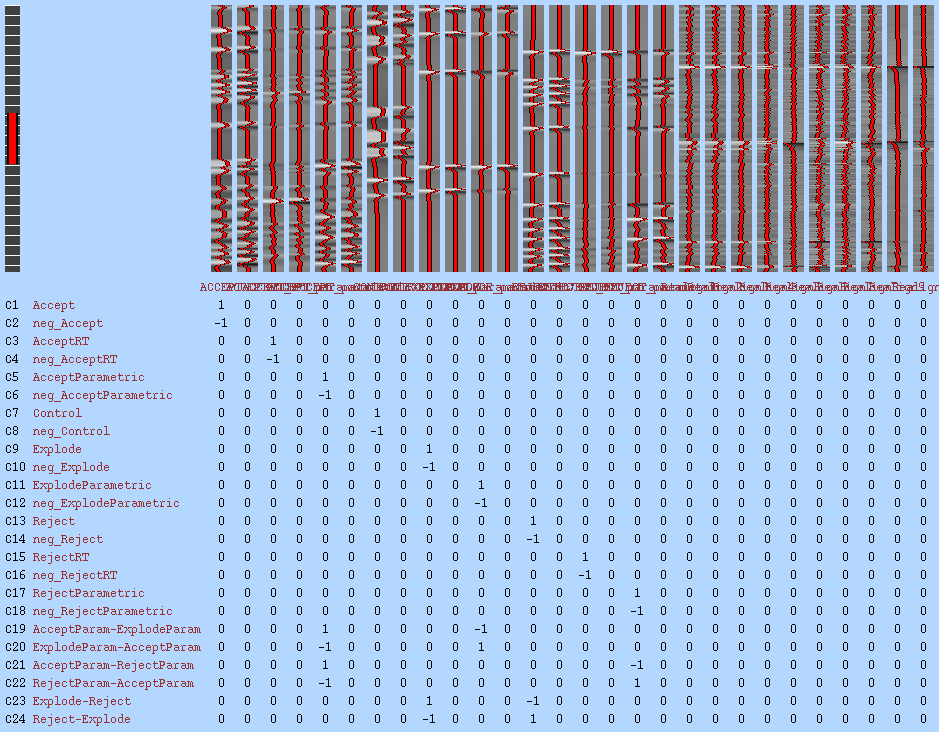

In [785]:
display.Image('ds000030-mini/derivatives/task/sub-50005/bart.feat/design.png', width=500)

In [ ]:
img = nilearn.image.load_img('ds000030-mini/derivatives/task/sub-50005/bart.feat/stats/res4d.nii.gz')
nilearn.plotting.plot_img(img)
img = nilearn.image.load_img('ds000030-mini/derivatives/task/sub-50005/bart.feat/stats/threshac1.nii.gz')
nilearn.plotting.plot_img(img)

## 3.2 Preprocessing and Exploration

### 3.2.1 Parcellation

In a parcellation, each voxel is mapped to a label associated with a functional unit that was derived by a graphical method like spacial ICA or seed-based analysis. Doing so allows you to reduce the influence of random noise, and allows you to model using higher semantic categories for instance brain networks such as the DMN. This particular parcellation is from <a id="ref-10" href="#cite-ThomasYeo2011">Yeo et al. 2011</a> and was generated from a resting state analysis of 1000 healthy control participants.

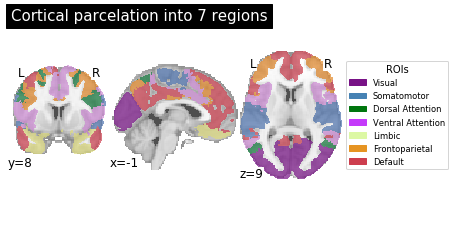

In [3]:
yeo_7, labels7 = utils.load_yeo7_atlas()
utils.plot_rois(yeo_7, labels7)

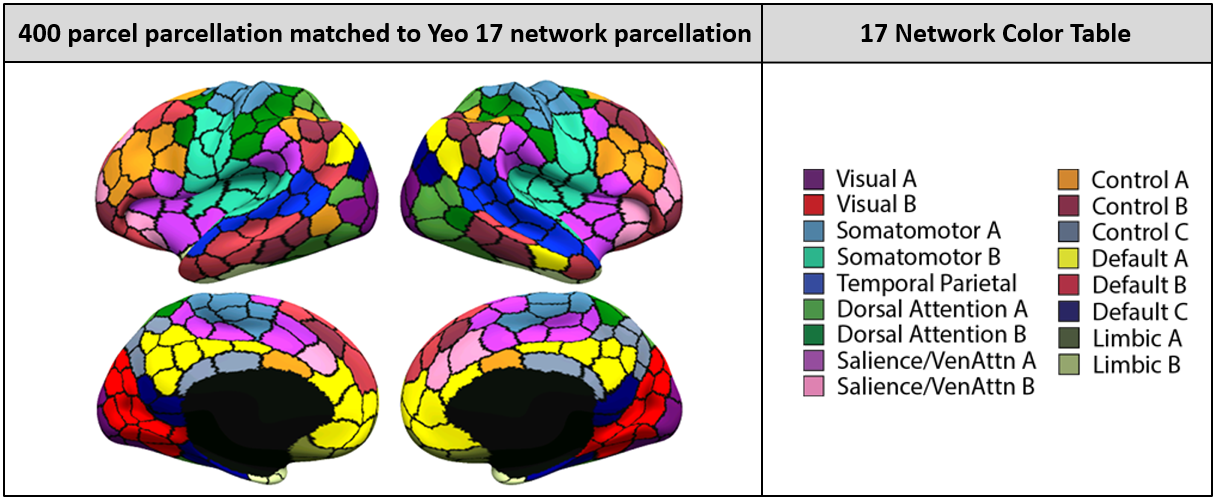

In [927]:
# sourced from https://github.com/ThomasYeoLab/CBIG/blob/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/README.md
display.Image('https://raw.githubusercontent.com/ThomasYeoLab/CBIG/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/readme_figures/Schaefer2018_400parcel_parcellation_match_Yeo_17_network_fslr32k.png')

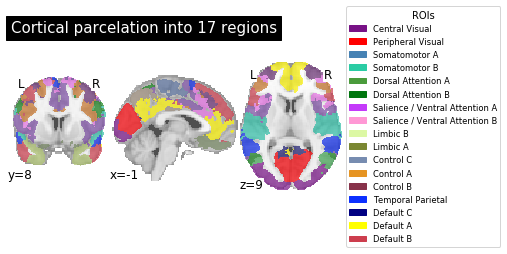

In [4]:
yeo_17, labels17 = utils.load_yeo17_atlas()
utils.plot_rois(yeo_17, labels17)

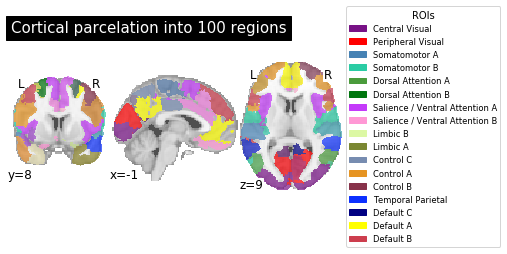

In [5]:
schaefer_100, labels100 = utils.load_schaefer100_atlas(labels17)
utils.plot_rois(schaefer_100, labels100, labels17)

Next, we do signal extraction by removing confounders, averaging the signal within each ROI, and cleaning the resulting time series.

In [1074]:
for name, data in utils.load_data('sub-10524', 'ds000030-mini').items():
    print(name, data.shape)

rest_7 (127, 7)
rest_100 (127, 100)
rest_17 (127, 17)


A subsample is taken which is representative of the larger demographics of the study, and downloaded.

In [6]:
subjects = []
for subject in os.listdir('ds000030-mini'):
    if subject.startswith('sub-'):
        subjects.append(subject)
sample = participants.loc[subjects]
def summarize(participants):
    participants['male'] = participants.gender == 'M'
    return pd.pivot_table(participants, values=['age', 'male', 'rest', 'T1w'], index=['diagnosis'],
        aggfunc={'age': np.mean, 'male': np.sum, 'rest': np.sum, 'T1w': np.sum}, margins=True)
print('Subsample demographics')
display.display(summarize(sample))
print('Overall')
display.display(summarize(participants))

Subsample demographics


,T1w,age,male,rest
diagnosis,,,,
ADHD,40.0,32.050000,21.0,40.0
BIPOLAR,49.0,35.285714,28.0,49.0
CONTROL,122.0,31.590164,65.0,122.0
SCHZ,50.0,36.460000,38.0,50.0
All,261.0,33.287356,152.0,261.0


Overall


,T1w,age,male,rest
diagnosis,,,,
ADHD,41.0,33.093023,21.0,42.0
BIPOLAR,49.0,35.285714,28.0,49.0
CONTROL,125.0,31.261538,68.0,127.0
SCHZ,50.0,36.460000,38.0,50.0
All,261.0,33.287356,152.0,261.0


In [7]:
preprocessed = collections.defaultdict(list)
conditions = list(set(participants.diagnosis))
for subject in subjects:
    for key, data in utils.load_data(subject, 'ds000030-mini').items():
        preprocessed[key].append(data)
for key in preprocessed:
    preprocessed[key] = np.array(preprocessed[key])

In [51]:
coords7 = nilearn.plotting.find_parcellation_cut_coords(yeo_7, label_hemisphere='left')
coords17 = nilearn.plotting.find_parcellation_cut_coords(yeo_17, label_hemisphere='left')
coords100 = nilearn.plotting.find_parcellation_cut_coords(schaefer_100, label_hemisphere='left')

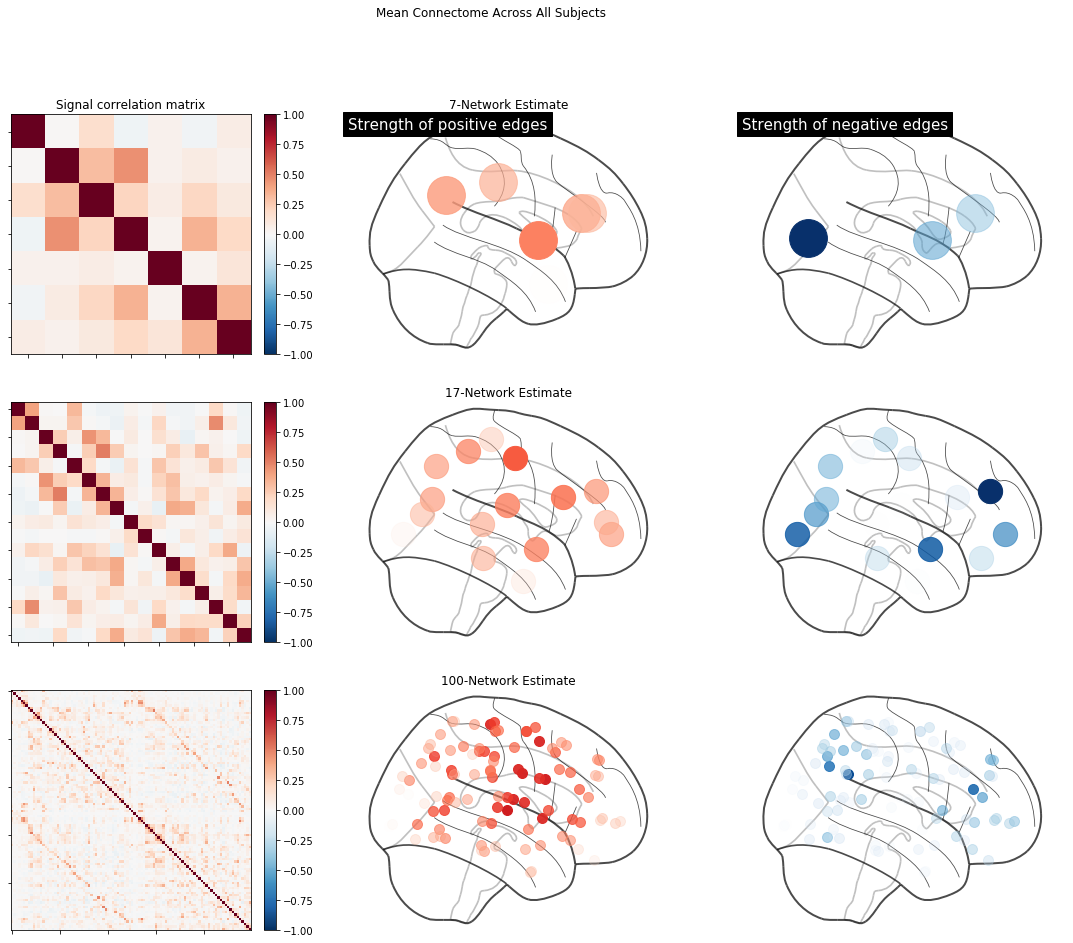

In [52]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
correlation_matrices = {}
plt.suptitle('Mean Connectome Across All Subjects')
for i, (networks, coords) in enumerate(zip([7, 17, 100], [coords7, coords17, coords100])):
    correlation_measure = nilearn.connectome.ConnectivityMeasure(kind='correlation')
    correlation_matrices[networks] = correlation_measure.fit_transform(preprocessed[f'rest_{networks}'])
    ax[i][0].set_title('Signal correlation matrix' if i==0 else None)
    mat = nilearn.plotting.plot_matrix(
        correlation_measure.mean_, vmin=-1, vmax=1, axes=ax[i][0], colorbar=False)
    fig.colorbar(mat, ax=ax[i][0], fraction=0.046, pad=0.04)
    ax[i][1].set_title('%d-Network Estimate' % networks)
    nilearn.plotting.plot_connectome_strength(
        np.clip(correlation_measure.mean_, 0, correlation_measure.mean_.max()), coords,
        cmap='Reds', display_mode='x', title='Strength of positive edges' if i==0 else None, axes=ax[i][1])
    nilearn.plotting.plot_connectome_strength(
        np.clip(correlation_measure.mean_, correlation_measure.mean_.min(), 0), coords,
        cmap='Blues', display_mode='x', title='Strength of negative edges' if i==0 else None, axes=ax[i][2])
plt.plot();

Let's also compare the connectivity within each group, as it related to the control group. Variance was also analyzed to see how representative the change was of the group (lower is better).

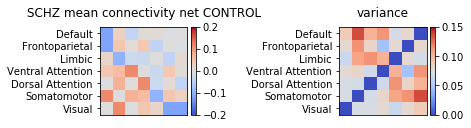

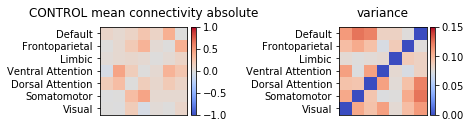

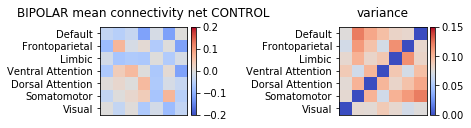

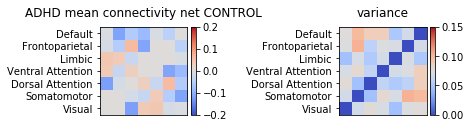

In [106]:
def plot_matrix(data, ax, ylabels=None, xlabels=None, title=None, cmap='coolwarm', rng=None, symmetric=True, xrotation=None, yrotation=None):
    if rng is None:
        rng = np.abs(data).max()
    img = ax.matshow(data, cmap=cmap, vmin=-rng if symmetric else 0, vmax=rng)
    ax.set_xlim([-.5,data.shape[1]-.5])
    ax.set_ylim([-.5,data.shape[0]-.5])
    if ylabels is not None:
        ax.set_yticklabels(ylabels, rotation=yrotation)
        ax.set_yticks(np.arange(len(ylabels)))
    else:
        ax.set_yticks([], [])
    if xlabels is not None:
        ax.set_xticklabels(xlabels, rotation=xrotation)
        ax.set_xticks(np.arange(len(xlabels)))
    else:
        ax.set_xticks([], [])
    ax.set_title(title)
    fig.colorbar(img, ax=ax, fraction=0.046, pad=0.04)

y = participants.loc[subjects]
for cond in conditions:
    X = correlation_matrices[7][y.diagnosis == cond]
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    rois = labels7.Name
    mean = X.mean(axis=0)
    if cond != 'CONTROL': # relative to control
        title = ' mean connectivity net CONTROL'
        rng = .2
        mean -= correlation_matrices[7][y.diagnosis == 'CONTROL'].mean(axis=0)
    else:
        title = ' mean connectivity absolute'
        rng = 1
    np.fill_diagonal(mean, 0)
    
    plot_matrix(mean, ax1, rng=rng, title=cond+title, ylabels=rois)
    plot_matrix(X.var(axis=0), ax2, rng=.15, title='variance', ylabels=rois, symmetric=False)
    
    fig.subplots_adjust(wspace=1.5)
    plt.plot()

## 3.3 Feature Engineering

There are many connectivity measures, of which pearson's correlation coefficient is just one. For time series analysis in many dimensions (multivariate pattern analysis), spectral methods that operate on the frequency domain and MAR methods such as Granger causality are common <a id="ref-11" href="#cite-Bastos2016">(Bastos 2016)</a>, however resting state data introduces nonstationarity so for the sake of time I stuck to simpler correlation analyses.

In `nilearn`, connectivity measures include correlations, partial correlations (the linear relationship conditioned on all other variables), and a combined method that attempts to capture patterns at the group-level called *tangent space embedding*. Individual connectivities are modelled as perturbations of the group connectivity matrix. However, in accounting for partial correlations and the group means, the connectivity values are no longer locally interpretable as *direct* connectivity. <a id="ref-12" href="#cite-Dadi2019">Dadi et al 2019</a> showed that across various cohorts and clinical questions, tangent connectivity is more predictive.

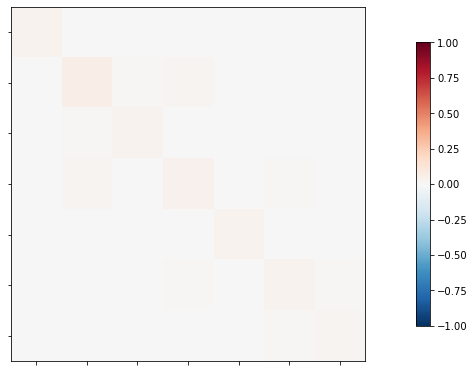

(261, 7, 7)

In [40]:
tangent_measure = nilearn.connectome.ConnectivityMeasure(kind='tangent')
tangent_matrices = np.array(tangent_measure.fit_transform(preprocessed['rest_7']))
nilearn.plotting.plot_matrix(tangent_measure.mean_, vmin=-1, vmax=1)
nilearn.plotting.show()
tangent_matrices.shape

Since TSE measures differences from the mean, when aggreggated these cancel out to 0.

Since matrices are symmetric, we will use only use one side of the diagonal for features.

For feature extraction, it would be helpful to utilize more information about a subject's diagnosis, such as diagnosis. I look into the published phenotypes.

In [9]:
import json

phenotypes = 'ds000030-mini/phenotype'
listing = {}
for filename in os.listdir(phenotypes):
    if filename.endswith('.json'):
        with open(os.path.join(phenotypes, filename)) as f:
            data = json.load(f)
            if 'MeasurementToolMetadata' in data:
                derivative =  []
                other = []
                for field, info in data.items():
                    if info.get('Derivative'):
                        derivative.append(field)
                    else:
                        other.append(field)
                listing[filename] = {
                    'metadata': data['MeasurementToolMetadata'],
                    'derivative_fields': derivative,
                    'fields': other,
                }

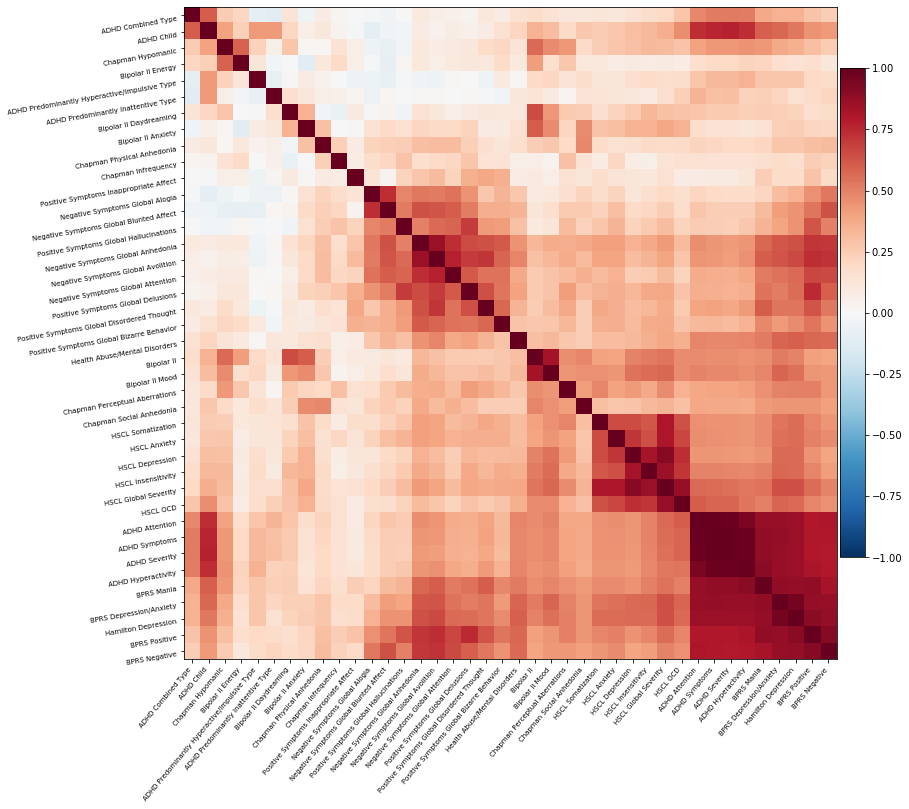

In [10]:
fields = [
    ['chapinf', 'Chapman Infrequency', dict(chapinf_total=''), 'SCHZ'],
    ['chapper', 'Chapman Perceptual Aberrations', dict(chapper_total=''), 'SCHZ'],
    ['chaphyp', 'Chapman Hypomanic', dict(chaphypo_total=''), 'SCHZ'],
    ['chapsoc', 'Chapman Social Anhedonia', dict(chapsoc_total=''), 'SCHZ'],
    ['chapphy', 'Chapman Physical Anhedonia', dict(chapphy_total=''), 'SCHZ'],
    ['bipolar_ii', 'Bipolar II', dict(bipollarii_mood='Mood', bipollarii_daydreaming='Daydreaming', 
                                    bipollarii_energy='Energy', bipollarii_anxiety='Anxiety',
                                      bipollarii_sumscore=''), 'BIPOLAR'],
    ['health', 'Health', dict(la2khealth7='Abuse/Mental Disorders'), 'CONTROL'],
    ['hamilton', 'Hamilton Depression', dict(hamd_28=''), 'CONTROL'],
    ['acds_adult', 'ADHD', dict(adhd_c_subtype='Subtype', childadhd='Child',
                                adult_totalseverity='Severity', adult_totalsymptoms='Symptoms',
                                adult_hyperactivity='Hyperactivity',
                                adult_attention='Attention'), 'ADHD'],
    ['bprs', 'BPRS', dict(bprs_positive='Positive', bprs_negative='Negative', bprs_mania='Mania', bprs_depanx='Depression/Anxiety',
#                          confidencassess='Confidence'
                         ), None],
#    ['scid', 'DSM IV Axis I', True],
    ['hopkins', 'HSCL', dict(hopkins_obscomp='OCD',hopkins_anxiety='Anxiety',hopkins_somatization='Somatization',
                             hopkins_intsensitivity='Insensitivity', hopkins_globalseverity='Global Severity', hopkins_depression='Depression'), 'CONTROL'],
    ['sans', 'Negative Symptoms', {'global_bluntaffect':'Global Blunted Affect',
                                    'global_attention':'Global Attention',
                                    'global_anhedonia':'Global Anhedonia',
                                    'global_alogia':'Global Alogia',
                                        'global_avolition':'Global Avolition'
#                                        'factor_avolition':'Factor Avolition',
#                                        'factor_bluntaffect':'Factor Blunted Affect',
#                                        'factor_alogia':'Factor Alogia',
#                                        'factor_anhedonia':'Factor Anhedonia',
#                                        'factor_attention':'Factor Attention',
                                  }, 'SCHZ'],
    ['saps', 'Positive Symptoms', {'global_bizarrebehav': 'Global Bizarre Behavior',
                                    'global_inappaffect': 'Inappropriate Affect',
                                    'global_delusions': 'Global Delusions',
                                    'global_posformalthought': 'Global Disordered Thought',
                                    'global_hallucinations': 'Global Hallucinations'
#                                    'factor_posformalthought': 'Factor Disordered Thought'
#                                    'factor_delusions': 'Factor Delusions',
#                                    'factor_hallucinations': 'Factor Hallucinations',
                                }, 'SCHZ']
]
psych = pd.DataFrame()
guide = {}
for file, name, map, group in fields:
    meta = pd.read_csv(os.path.join(phenotypes, file)+'.tsv', sep='\t')
    with open(os.path.join(phenotypes, file)+'.json') as f:
        schema = json.load(f)
    if map is True:
        psych = psych.join(meta, rsuffix='2', how='outer')
        guide.extend(schema)
        continue
    mapper = {'participant_id': 'participant_id'}
    for old, new in map.items():
        if new != '':
            new = ' '+new
        new = name+new
        mapper[old] = new
        guide[new] = schema[old]
    psych = psych.join(meta[list(mapper.keys())].rename(columns=mapper), rsuffix='2', how='outer')
        
# Dickman Impulsivity func_pos,dysfunc_neg,dysfunc_pos,dysfunc_total,func_total,func_neg
# barratt.json Barratt Impulsiveness bis_
# eysenck.json Eysenck's Impulsivity Inventory scorev,scoree,scorei
psych = psych.drop(columns=['participant_id2'])
psych['ADHD Child'] = psych['ADHD Child'].where(psych['ADHD Child'] == 1, 0)
psych = psych.fillna(0)
psych = psych.set_index('participant_id')
psych = psych.where(psych >= 0, 0)
with open(os.path.join(phenotypes, 'acds_adult')+'.json') as f:
    levels = json.load(f)['adhd_c_subtype']['Levels']
    psych = pd.concat([psych.drop(columns=['ADHD Subtype']),
                       pd.get_dummies(psych['ADHD Subtype'].map(lambda i: levels.get(str(i)[0]))).add_prefix('ADHD ')],
                      axis=1)

nilearn.plotting.plot_matrix(psych.corr('spearman').values, labels=list(psych.columns), reorder=True,
                             figure=(14, 12), vmin=-1, vmax=1)
nilearn.plotting.show()

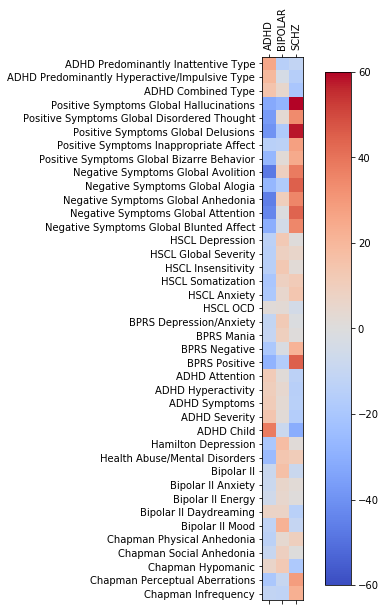

In [109]:
import scipy

y_disc = participants.loc[subjects].diagnosis
labeler = sklearn.preprocessing.LabelBinarizer().fit(list(set(participants.diagnosis)-{'CONTROL'}))
y_bin = pd.DataFrame(labeler.transform(y_disc), columns=labeler.classes_, index=y_disc.index)
y_disc.shape, y_bin.shape

fig, ax = plt.subplots(figsize=(10, 10))
plot_matrix(
    np.dot(
        scipy.signal.detrend(y_bin.values, type='constant').T,
        scipy.stats.zscore(psych.loc[subjects].values)).T,
    ax,
    xlabels = y_bin.columns, xrotation='vertical',
    ylabels = psych.columns,
    rng=60)

In [110]:
Y = psych.loc[subjects].values

## 3.4 Prediction

fMRI data is inherently "big": with each voxel having three spacial dimensions and activity over time, the amount of data generated from an experiment can grow quickly. Good *dimensionality reduction*, transforming the data to a representation that retains some of the information but fewer components has a few key advantages:
 - There are limits to how much information you can display, so reduced data might make for a good summary or have better geometric properties.
 - It could make for better features, or inputs to a model, by decreasing the chance for that model to fit to noise (*overfitting*). This is the well-known "curse of dimensionality".

This informed my choice of prediction methods.
 - Probabilistic methods with quantifiable uncertainty were prefered over frameworks such as random forests which are known to overfit in practice.
 - Efforts were made to cut down the number of features either by various methods.
 
My ending pipeline consisted of 4 steps:
1. Calculation of the connectivity matrix between the ROI time courses. `fisher` uses the Pearson correlation coefficient ($r$) that is [Fisher transformed](https://en.wikipedia.org/wiki/Fisher_transformation) to stabilize the variance (`fisher`), and the previously mentioned tangent space embedding (`tangent`).
2. Select a set of informative features. The options were to pass through with no filtering (`baseline`), select the top half of features using the ANOVA F-test (`anova`) and mutual information (`mi`), doing feature agglomeration by combining features that were close together as measured by cosine distance (`agglom`), and doing CCA (`cca`) to transform the features to a representation that maximizes linear correlation with a chosen subset of the psychological scales (seen above).
3. Predict the diagnostic category (healthy control, bipolar, schizophrenic, or ADHD) given the features using one of the models described in the initial section.
4. Evaluate the goodness of fit using the chosen metrics.

In [270]:
import sklearn.discriminant_analysis
import sklearn.gaussian_process
import sklearn.cross_decomposition

MIN_DIM = min((X[0].shape[1]-1)//2 for X in preprocessed.values())
pipe = utils.PipelineGrid(
    features=preprocessed,
    transformers=[
        {'tangent': nilearn.connectome.ConnectivityMeasure(
            kind='tangent', vectorize=True, discard_diagonal=True),
         'fisher': utils.add_transformer_hook(nilearn.connectome.ConnectivityMeasure, np.arctanh,
            kind='correlation', vectorize=True, discard_diagonal=True)},
         {
            'baseline': utils.DummyTransformer(),
            'cca': utils.add_transformer_hook(sklearn.cross_decomposition.CCA,
                                              lambda XY: XY[0] if type(XY) is tuple else XY, n_components=min(MIN_DIM, Y.shape[1])),
            'agglom': sklearn.cluster.FeatureAgglomeration(affinity='cosine', linkage='single', pooling_func=np.mean, n_clusters=MIN_DIM),
            'anova': sklearn.feature_selection.SelectPercentile(sklearn.feature_selection.f_classif, percentile=50), # ANOVA F-Test
            'mi': sklearn.feature_selection.SelectPercentile(sklearn.feature_selection.mutual_info_classif, percentile=50),
        }
    ],
    estimators={
        'lda': sklearn.discriminant_analysis.LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen'),
        'qda': sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis(),
        'logistic': sklearn.linear_model.LogisticRegressionCV(multi_class='multinomial', class_weight='balanced', max_iter=300),
        'svc': sklearn.svm.SVC(kernel='rbf', gamma='scale', # SVM Classifier with Gaussian kernel
                               probability=True, decision_function_shape='ova', class_weight='balanced', break_ties=True), 
        'gp': sklearn.gaussian_process.GaussianProcessClassifier(warm_start=True),
    },
    metrics={
        'accuracy': utils.accuracy,
        'aic': utils.aic,
        'roc': utils.roc,
    },
    progress=True,
)

Next we set up cross validation.

In [239]:
y = y_disc
folds = 1
test_sizes = [.5, .25,
               .1, .05, 4]
scores = collections.defaultdict(lambda: collections.defaultdict(list))
for fname, X, split, (train, test) in tqdm(pipe.cross_validate(y, test_sizes=test_sizes, folds=folds, random_state=1), total=folds*len(test_sizes)*len(pipe.features)):
    for name, sc in pipe.score_all(fname, X[train], y[train], X[test], y[test], cca=Y[train]).items():
        scores[split][name].append(sc)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear"

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear"

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear"

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear"

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/an

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/an

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear"

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:96: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:96: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarni

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:96: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/_pls.py:96: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarni

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  wa

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/an

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/skl

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-le

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:788: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


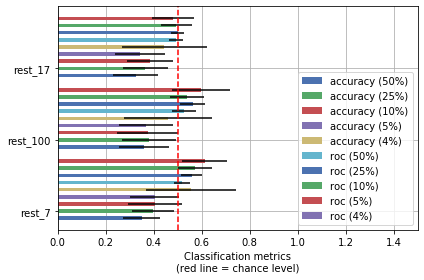

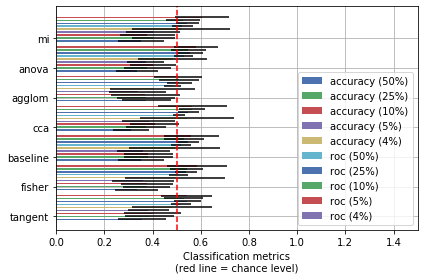

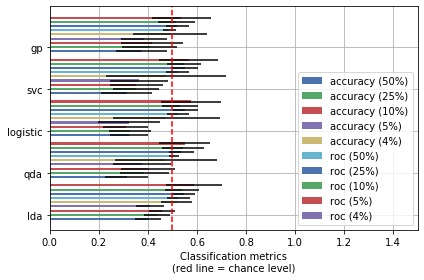

In [241]:
def compare_metrics(pipe, scores, metrics=['accuracy'], of='estimators'):
    plt.figure(figsize=(6, 4))
    if of == 'estimators':
        comparison = list(pipe.estimators)
    elif of == 'transformers':
        comparison = []
        for ts in pipe.transformers:
            comparison += [name for name, _ in ts]
    elif of == 'features':
        comparison = list(pipe.features)
    else:
        assert False
    for i, metric in enumerate(metrics):
        for j, split in enumerate(scores):
                sc3 = [[[np.mean(list(sc2[metric].values())) if type(sc2[metric]) is dict else sc2[metric] for sc2 in sc1]
                       for name, sc1 in scores[split].items() if which in name] for which in comparison]
                mean_scores = [np.mean(sc3[i]) for i, _ in enumerate(comparison)]
                scores_std = [np.std(sc3[i]) for i, _ in enumerate(comparison)]
                positions = np.arange(len(comparison))*.1*len(metrics)*len(scores) + i*.1*len(scores) + .1*j
                plt.barh(positions, mean_scores, align='center', height=.05,
                         xerr=scores_std, label='%s (%d%%)' % (metric, 100*split if split < 1 else split))
    yticks = [name.replace(' ', '\n') for name in comparison]
    plt.yticks(np.arange(len(comparison))*.1*len(metrics)*len(scores) + .1, yticks)
    plt.gca().grid(True)
    plt.gca().set_axisbelow(True)
    plt.xlim([0, 1.5])
    plt.gca().axvline(.5, color='red', linestyle='--')
    plt.xlabel('Classification metrics\n(red line = chance level)')
    
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='lower right')
    
    plt.tight_layout()

compare_metrics(pipe, scores, of='features', metrics=['accuracy', 'roc'])
compare_metrics(pipe, scores, of='transformers', metrics=['accuracy', 'roc'])
compare_metrics(pipe, scores, of='estimators', metrics=['accuracy', 'roc'])

Next, we select the top models as determined by accuracy. The top models are all based on the 7-network estimate by Yeo, use tangent space embedding.

In [298]:
level = .1
metric = 'aic'
top_accuracy = sorted(scores[level], key=lambda n: np.mean([fold[metric] for fold in scores[level][n]]), reverse=True)
metric = 'roc'
top_roc = sorted(scores[level], key=lambda n: np.mean([np.mean(list(fold[metric].values()))
                                                       for fold in scores[level][n]]), reverse=True)
for t in top_accuracy[:10]:
    print(t)
    print(scores[level][t])


('rest_100', 'fisher', 'mi', 'qda')
[{'accuracy': 0.14814814814814814, 'aic': 29.273772484553543, 'roc': {'ADHD': 0.41304347826086957, 'BIPOLAR': 0.38636363636363635, 'CONTROL': 0.32967032967032966, 'SCHZ': 0.4636363636363636}}]
('rest_100', 'fisher', 'anova', 'qda')
[{'accuracy': 0.2222222222222222, 'aic': 26.715344603449044, 'roc': {'ADHD': 0.3695652173913043, 'BIPOLAR': 0.509090909090909, 'CONTROL': 0.5137362637362637, 'SCHZ': 0.36363636363636365}}]
('rest_100', 'tangent', 'baseline', 'qda')
[{'accuracy': 0.25925925925925924, 'aic': 25.436130662896797, 'roc': {'ADHD': 0.3695652173913043, 'BIPOLAR': 0.5409090909090909, 'CONTROL': 0.5467032967032966, 'SCHZ': 0.509090909090909}}]
('rest_100', 'tangent', 'mi', 'qda')
[{'accuracy': 0.25925925925925924, 'aic': 25.436130662896797, 'roc': {'ADHD': 0.43478260869565216, 'BIPOLAR': 0.5636363636363636, 'CONTROL': 0.5467032967032966, 'SCHZ': 0.41818181818181815}}]
('rest_17', 'tangent', 'baseline', 'qda')
[{'accuracy': 0.25925925925925924, 'aic'

In [290]:
scores[level][('rest_7',
              'tangent',
              'baseline',
              'lda')]

[{'accuracy': 0.42857142857142855,
  'aic': -42.76775764364749,
  'roc': {'ADHD': 0.875,
   'BIPOLAR': 0.303030303030303,
   'CONTROL': 0.6875,
   'SCHZ': 0.7878787878787878}}]

In [ ]:
We visualize

Some observations:
 - The predictions were highly biased towards picking control. This is due to having an imbalanced dataset: 

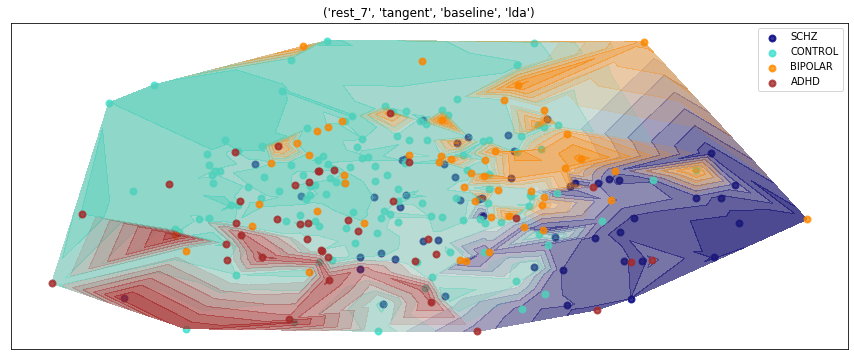

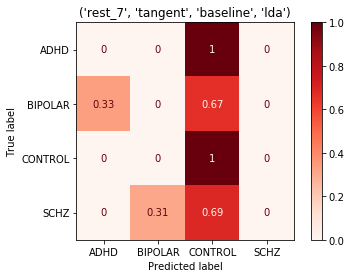

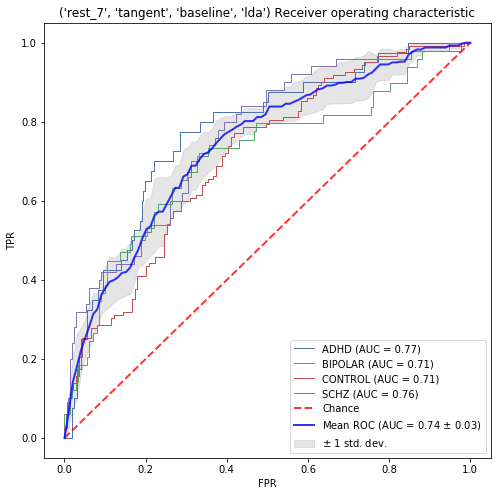

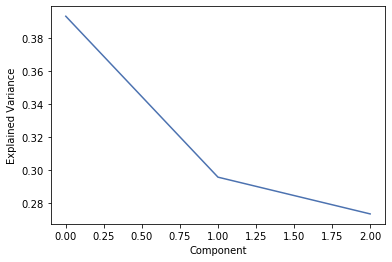

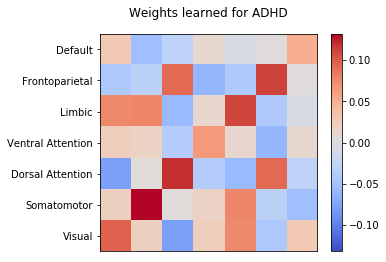

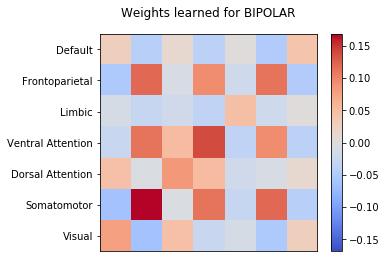

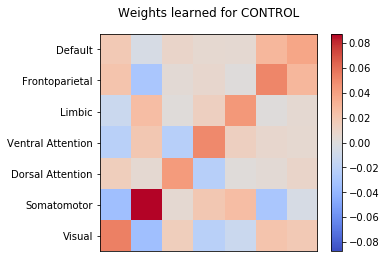

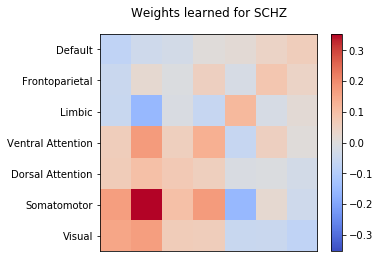

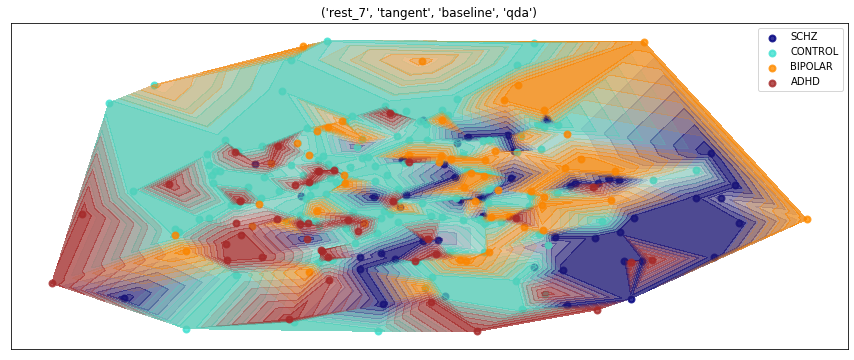

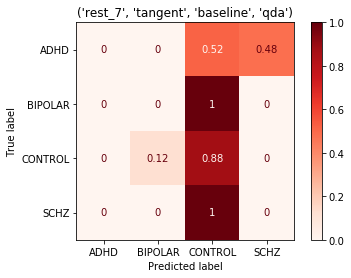

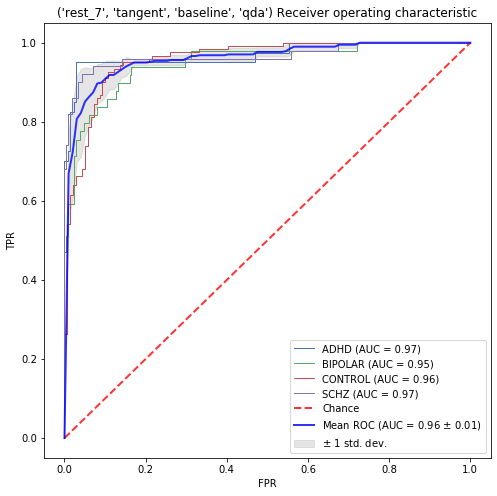

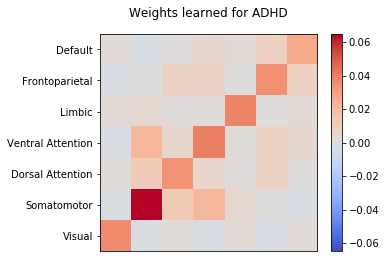

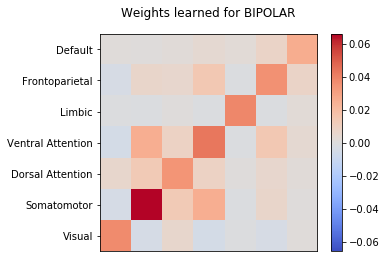

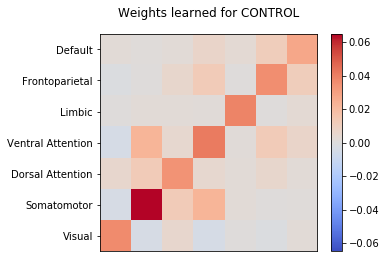

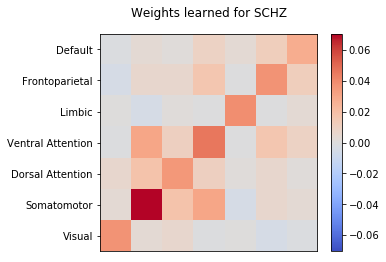

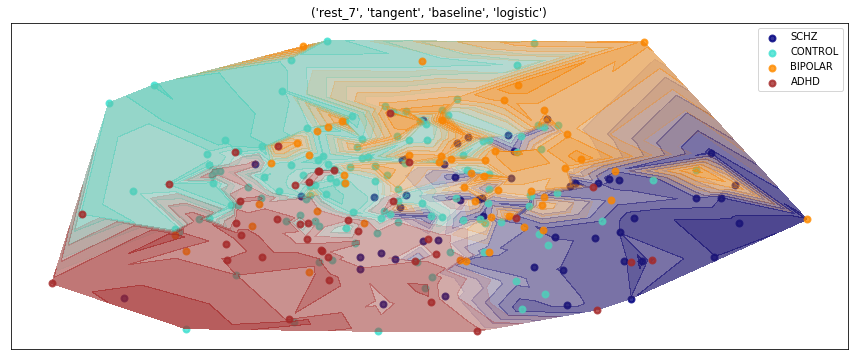

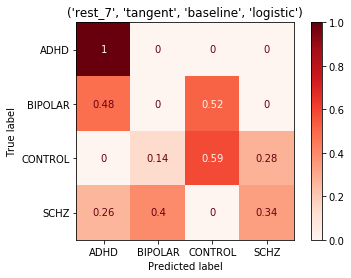

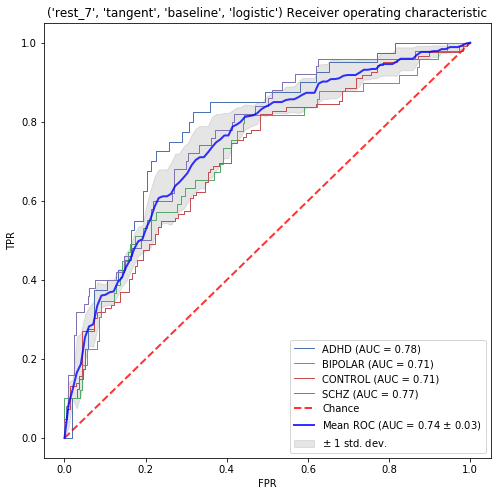

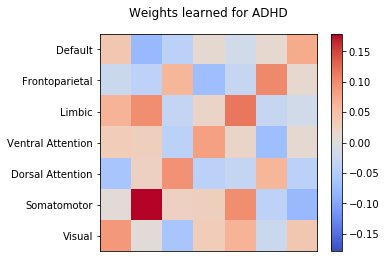

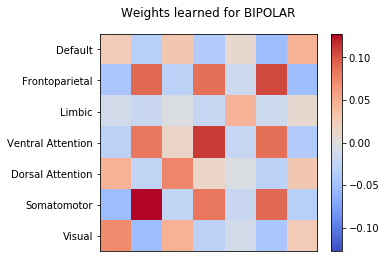

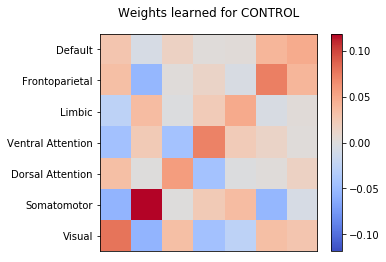

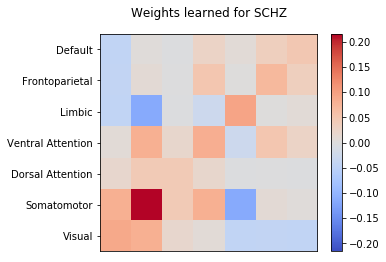

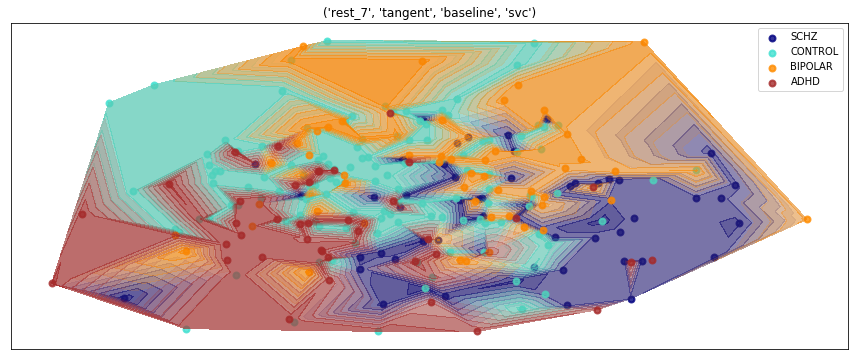

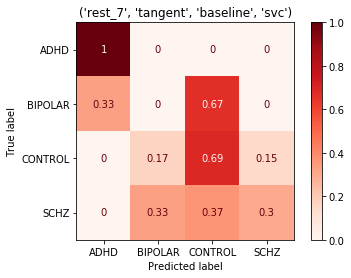

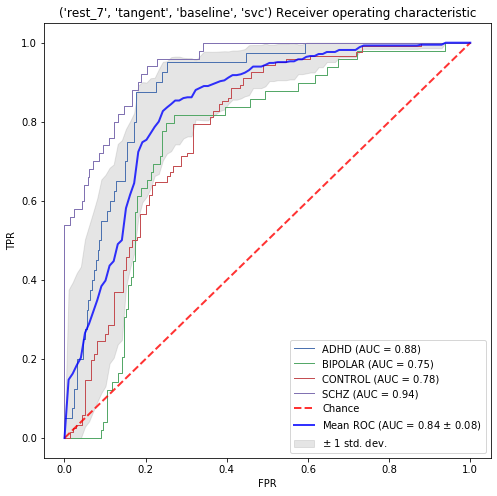

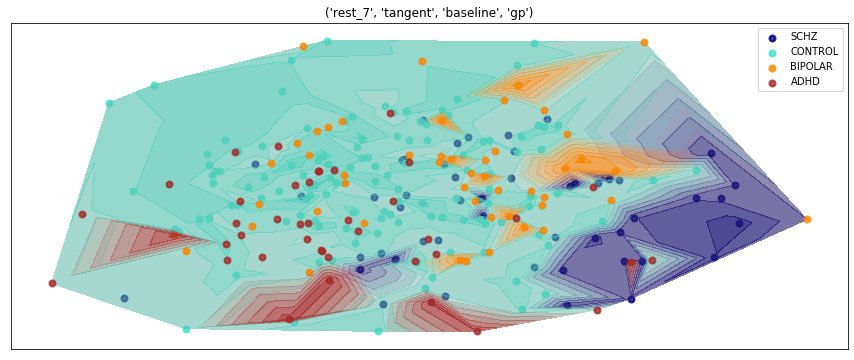

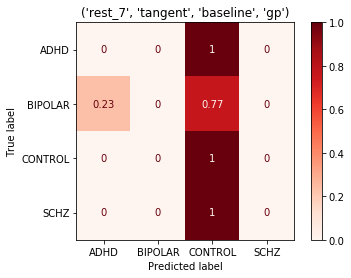

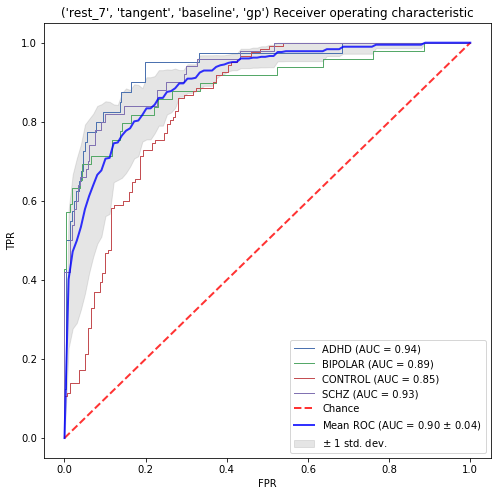

In [286]:
colors = ['navy', 'turquoise', 'darkorange', 'brown']

def show_fit(model):
    labels = {
        'rest_7': labels7,
        'rest_17': labels17,
        'rest_100': labels100,
    }[model.name[0]]
    weights = None
    if model.name[-1] == 'lda':
        evr = model.explained_variance_ratio_
        if evr is not None:
            plt.plot(model.explained_variance_ratio_)
            plt.ylabel('Explained Variance')
            plt.xlabel('Component')
        weights = model.coef_
    if model.name[-1] == 'qda':
        weights = model.means_
    if model.name[-1] == 'logistic':
        weights = model.coef_
    if weights is not None:
        for i, cond in enumerate(model.classes_):
            fig, ax = plt.subplots()
            dim = model.transformers[0][1].mean_.shape[0]
            diagonal = np.zeros((1, dim))
            plot_matrix(
                model.inverse_transform([weights[i]], tangent=diagonal, fisher=diagonal)[0], ax,
                ylabels=labels.Name, title='Weights learned for '+cond)

def show_range(clf, X_r, X, y):
    fig, ax = plt.subplots(figsize=(15, 6))
    
    Z_y = clf.predict(X)
    Z_p = clf.predict_proba(X).max(axis=1)

    for cond, color in zip(conditions, colors):
        trans = list(matplotlib.colors.to_rgba(color))
        full = list(matplotlib.colors.to_rgba(color))
        trans[3] = 0
        full[3] = .8
        ax.tricontourf(X_r[:, 0], X_r[:, 1], np.where(Z_y == cond, Z_p, 0),
                       cmap=matplotlib.colors.LinearSegmentedColormap.from_list('', [trans, full]))
        ax.scatter(X_r[y == cond, 0], X_r[y == cond, 1], color=color, alpha=.8, lw=2, label=cond)
    ax.legend(loc='best', shadow=False, scatterpoints=1)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)


for i, name in enumerate(top, start=1):
    X, clf = pipe.get_model(name)
    
    # Find lower dimensional representation via LDA
    corr = dict(pipe.transformers[0])[clf.name[1]].fit_transform(X)
    lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components=2, store_covariance=True)
    X_r = lda.fit_transform(corr, y_disc)
    
    train, test = next(sklearn.model_selection.StratifiedShuffleSplit(
        n_splits=1, random_state=1, test_size=level).split(X, y_disc))
    clf.fit(X[train], y_disc[train], cca=Y[train])
    
    # Contour plot
    show_range(clf, X_r, X, y)
    plt.show()
    
    # Confusion matrix
    disp = sklearn.metrics.plot_confusion_matrix(
        clf, X[test], y[test],
        sample_weight=clf.predict_proba(X).max(axis=1)[test],
        normalize='true', cmap='Reds')
    disp.ax_.grid(False)
    disp.ax_.set_title(name)
    plt.show()
    
    # ROC curve
    utils.roc(clf, X, y, plot=True, multiclass=True, name=str(name))
    
    show_fit(clf)


# 4. Conclusion

## 4.1 Interpretation of Results

There is a lot of room for improvement. The feature space was small, better signals could have been extracted from the voxels and time series, and I could have ran the classifiers on the rest of the data. 

I was also planning to incorporate responses to psychometric items included in the phenotype data to better characterize the variation in conditions present in the dataset.

## 4.2 Discussion

Issues:
 - I did not account for variability in brain organization, rather I assumed the same parcellations were accurate for every subject. As we learned in class, this is unreasonable due to the high amount of individual
 - 

As measurement and analysis techniques improve, the potential for improving patient outcomes greatly increases. However, if the history of psychiatry has taught us anything, this same capability has the potential to mistreat, overdiagnose, or diagnose with undue confidence based on today's faulty understanding.
Any discussion on the study of individual differences also has the potential to veer into phrenology. This is why interpretability of results is so important: how can we trust that the data a patient gives over won't be used against them?

# 5. Reproducing

Downloaded from [OpenNeuro](https://openneuro.org/datasets/ds000030/versions/00016/download).

References autogenerated by [doi2bib](https://www.doi2bib.org/) and [Calysto](https://github.com/Calysto/notebook-extensions).

The utils.py file is added to this submission.  All of the research and early visualizations were done in this notebook and are included in the checkpoints, if review is needed.

<!--bibtex

@article{poldrack2016phenome,
  title={A phenome-wide examination of neural and cognitive function},
  author={Russell Poldrack et al},
  journal={Scientific data},
  volume={3},
  pages={160110},
  year={2016},
  publisher={Nature Publishing Group},
  url={https://www.nature.com/articles/sdata2016110},
}

@article{cnpdata,
    author={Gorgolewski, KJ and Durnez, J and Poldrack, RA},
    title={Preprocessed Consortium for Neuropsychiatric Phenomics dataset [version 2]},
    journal={F1000Research},
    volume={6},
    year={2017},
    number={1262},
    doi={10.12688/f1000research.11964.2},
    url={https://f1000research.com/articles/6-1262/v2},
}

@misc{nami,
    title={{Mental Health by the Numbers}},
    howpublished={https://www.nami.org/learn-more/mental-health-by-the-numbers},
    publisher={NAMI}
}

@Article{pmid20703409,
   Author="Trivedi, J. K",
   Title="{{C}ognitive deficits in psychiatric disorders: {C}urrent status}",
   Journal="Indian J Psychiatry",
   Year="2006",
   Volume="48",
   Number="1",
   Pages="10--20",
   Month="Jan"
}

@Article{pmid26742510,
   Author="Strauss, G. P. et al",
   Title="{{N}egative symptoms in bipolar disorder and schizophrenia: {A} psychometric evaluation of the brief negative symptom scale across diagnostic categories}",
   Journal="Schizophr. Res.",
   Year="2016",
   Volume="170",
   Number="2-3",
   Pages="285--289",
   Month="Feb"
}

@article{Gorgolewski2016,
  doi = {10.1038/sdata.2016.44},
  url = {https://doi.org/10.1038/sdata.2016.44},
  year = {2016},
  month = jun,
  publisher = {Springer Science and Business Media {LLC}},
  volume = {3},
  number = {1},
  author = {Krzysztof J. Gorgolewski et. al},
  title = {The brain imaging data structure,  a format for organizing and describing outputs of neuroimaging experiments},
  journal = {Scientific Data}
}

@article{BischoffGrethe2007,
  doi = {10.1002/hbm.20312},
  url = {https://doi.org/10.1002/hbm.20312},
  year = {2007},
  publisher = {Wiley},
  volume = {28},
  number = {9},
  pages = {892--903},
  author = {Amanda Bischoff-Grethe et. al},
  title = {A technique for the deidentification of structural brain {MR} images},
  journal = {Human Brain Mapping}
}

@article{Esteban2018,
  doi = {10.1038/s41592-018-0235-4},
  url = {https://doi.org/10.1038/s41592-018-0235-4},
  year = {2018},
  month = dec,
  publisher = {Springer Science and Business Media {LLC}},
  volume = {16},
  number = {1},
  pages = {111--116},
  author = {Oscar Esteban et. al},
  title = {{fMRIPrep}: a robust preprocessing pipeline for functional {MRI}},
  journal = {Nature Methods}
}

@article{ThomasYeo2011,
  doi = {10.1152/jn.00338.2011},
  url = {https://doi.org/10.1152/jn.00338.2011},
  year = {2011},
  month = sep,
  publisher = {American Physiological Society},
  volume = {106},
  number = {3},
  pages = {1125--1165},
  author = {BT Yeo et. al},
  title = {The organization of the human cerebral cortex estimated by intrinsic functional connectivity},
  journal = {Journal of Neurophysiology}
}

@article{Dadi2019,
  doi = {10.1016/j.neuroimage.2019.02.062},
  url = {https://doi.org/10.1016/j.neuroimage.2019.02.062},
  year = {2019},
  month = may,
  publisher = {Elsevier {BV}},
  volume = {192},
  pages = {115--134},
  author = {Kamalaker Dadi et. al},
  title = {Benchmarking functional connectome-based predictive models for resting-state {fMRI}},
  journal = {{NeuroImage}}
}

@article{Bastos2016,
  doi = {10.3389/fnsys.2015.00175},
  url = {https://doi.org/10.3389/fnsys.2015.00175},
  year = {2016},
  month = jan,
  publisher = {Frontiers Media {SA}},
  volume = {9},
  author = {André M. Bastos and Jan-Mathijs Schoffelen},
  title = {A Tutorial Review of Functional Connectivity Analysis Methods and Their Interpretational Pitfalls},
  journal = {Frontiers in Systems Neuroscience}
}

@article{Schaefer2017,
  doi = {10.1093/cercor/bhx179},
  url = {https://doi.org/10.1093/cercor/bhx179},
  year = {2017},
  month = jul,
  publisher = {Oxford University Press ({OUP})},
  volume = {28},
  number = {9},
  pages = {3095--3114},
  author = {Alexander Schaefer et. al},
  title = {Local-Global Parcellation of the Human Cerebral Cortex from Intrinsic Functional Connectivity {MRI}},
  journal = {Cerebral Cortex}
}

@article{Abraham2014,
  doi = {10.3389/fninf.2014.00014},
  url = {https://doi.org/10.3389/fninf.2014.00014},
  year = {2014},
  publisher = {Frontiers Media {SA}},
  volume = {8},
  author = {Alexandre Abraham et. al},
  title = {Machine learning for neuroimaging with scikit-learn},
  journal = {Frontiers in Neuroinformatics}
}

@article{scikit-learn,
 url={http://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html},
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. et. al},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

@article{Akaike1974,
  doi = {10.1109/tac.1974.1100705},
  url = {https://doi.org/10.1109/tac.1974.1100705},
  year = {1974},
  month = dec,
  publisher = {Institute of Electrical and Electronics Engineers ({IEEE})},
  volume = {19},
  number = {6},
  pages = {716--723},
  author = {H. Akaike},
  title = {A new look at the statistical model identification},
  journal = {{IEEE} Transactions on Automatic Control}
}

@misc{LDAwiki,
    author = "{Wikipedia contributors}",
    title = "Linear discriminant analysis --- {Wikipedia}{,} The Free Encyclopedia",
    year = "2019",
    url = "https://en.wikipedia.org/w/index.php?title=Linear_discriminant_analysis&oldid=929719887",
    note = "[Online; accessed 20-December-2019]"
}

-->

# References

<a id="cite-pmid20703409"/><sup><a href=#ref-1>[^]</a></sup>Trivedi, J. K. 2006. _Cognitive deficits in psychiatric disorders: Current status_.

<a id="cite-poldrack2016phenome"/><sup><a href=#ref-2>[^]</a></sup>Russell Poldrack et al. 2016. _A phenome-wide examination of neural and cognitive function_. [URL](https://www.nature.com/articles/sdata2016110)

<a id="cite-cnpdata"/><sup><a href=#ref-3>[^]</a><a href=#ref-5>[^]</a></sup>Gorgolewski, KJ and Durnez, J and Poldrack, RA. 2017. _Preprocessed Consortium for Neuropsychiatric Phenomics dataset [version 2]_. [URL](https://f1000research.com/articles/6-1262/v2)

<a id="cite-Gorgolewski2016"/><sup><a href=#ref-4>[^]</a></sup>Krzysztof J. Gorgolewski et. al. 2016. _The brain imaging data structure,  a format for organizing and describing outputs of neuroimaging experiments_. [URL](https://doi.org/10.1038/sdata.2016.44)

<a id="cite-Esteban2018"/><sup><a href=#ref-6>[^]</a></sup>Oscar Esteban et. al. 2018. _fMRIPrep: a robust preprocessing pipeline for functional MRI_. [URL](https://doi.org/10.1038/s41592-018-0235-4)

<a id="cite-Abraham2014"/><sup><a href=#ref-7>[^]</a></sup>Alexandre Abraham et. al. 2014. _Machine learning for neuroimaging with scikit-learn_. [URL](https://doi.org/10.3389/fninf.2014.00014)

<a id="cite-LDAwiki"/><sup><a href=#ref-8>[^]</a></sup>Wikipedia contributors. 2019. _Linear discriminant analysis --- Wikipedia, The Free Encyclopedia_. [URL](https://en.wikipedia.org/w/index.php?title=Linear_discriminant_analysis&oldid=929719887)

<a id="cite-Akaike1974"/><sup><a href=#ref-9>[^]</a></sup>H. Akaike. 1974. _A new look at the statistical model identification_. [URL](https://doi.org/10.1109/tac.1974.1100705)

<a id="cite-ThomasYeo2011"/><sup><a href=#ref-10>[^]</a></sup>BT Yeo et. al. 2011. _The organization of the human cerebral cortex estimated by intrinsic functional connectivity_. [URL](https://doi.org/10.1152/jn.00338.2011)

<a id="cite-Bastos2016"/><sup><a href=#ref-11>[^]</a></sup>André M. Bastos and Jan-Mathijs Schoffelen. 2016. _A Tutorial Review of Functional Connectivity Analysis Methods and Their Interpretational Pitfalls_. [URL](https://doi.org/10.3389/fnsys.2015.00175)

<a id="cite-Dadi2019"/><sup><a href=#ref-12>[^]</a></sup>Kamalaker Dadi et. al. 2019. _Benchmarking functional connectome-based predictive models for resting-state fMRI_. [URL](https://doi.org/10.1016/j.neuroimage.2019.02.062)

